# Sea Level UK Data
Notebook for analysing high and low tide measurement data for several locations in the UK.
Data source is British Oceanographic Data Centre (https://www.bodc.ac.uk/data/online_delivery/). Data set with daily gauge data (even possible to resample it in every 15 minutes). Data has been obtained on 18 October 2016.

In [2]:
%matplotlib inline

from datetime import datetime
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['svg.fonttype'] = 'none'

Read all tides data including meta data and tides data. Comments inside the files were deleted such as:

- Difference in position
- Difference in instrument

In [133]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d')

#parse meta data

def parse_meta_data(filename):
    df = pd.read_csv(filename, nrows=4, header=None, sep=':', usecols=[1])
    df = df.transpose()
    df.columns = ['Port', 'Location', 'Latitude', 'Longitude']
    df.Location = df.Location.str.strip()
    return df.iloc[0] #nur noch erste Zeile der Tabelle, kein Dataframe mehr, sondern nur noch eine Series


#parse tides data and add meta data

def parse_tides(filename):
    meta_info = []
    
    #load data from files
    df = pd.read_csv(filename, skiprows=11, header=None, delim_whitespace=True, names=['id','timestamp', 'time', 'tide', 'residual'], 
                 usecols=[1, 3, 4], parse_dates=[0], date_parser=dateparse)
    
    # Convert to numeric, data points ending with M (improbable) and null values are set to NaN
    df['tide'] = pd.to_numeric(df['tide'], errors='coerce')
    df['residual'] = pd.to_numeric(df['residual'], errors='coerce')
    
    #convert tide to mm
    df['tide'] = df['tide'] * 1000

    df = df.set_index('timestamp').resample('d').mean()
    
    #get meta data
    meta_info = parse_meta_data(filename)
    
    #add meta data to dataframe
    df['Latitude'] = float(meta_info['Latitude'])
    df['Longitude'] = float(meta_info['Longitude'])
    df['Location'] = meta_info['Location']
    df['Country'] = 'United Kingdom'
    df['tag'] = 'bodc'
    
    print(filename)
    return df

filenames = glob.glob('data/bodc_data/*.txt')

df = pd.concat([parse_tides(f) for f in filenames])


df

data/bodc_data/1915NEW.txt
data/bodc_data/1916NEW.txt
data/bodc_data/1917NEW.txt
data/bodc_data/1918NEW.txt
data/bodc_data/1919NEW.txt
data/bodc_data/1920NEW.txt
data/bodc_data/1921NEW.txt
data/bodc_data/1922NEW.txt
data/bodc_data/1923NEW.txt
data/bodc_data/1924DOV.txt
data/bodc_data/1924NEW.txt
data/bodc_data/1925NEW.txt
data/bodc_data/1926DOV.txt
data/bodc_data/1926NEW.txt
data/bodc_data/1927NEW.txt
data/bodc_data/1928DOV.txt
data/bodc_data/1928NEW.txt
data/bodc_data/1929NEW.txt
data/bodc_data/1930ABE.txt
data/bodc_data/1930DOV.txt
data/bodc_data/1930NEW.txt
data/bodc_data/1931ABE.txt
data/bodc_data/1931NEW.txt
data/bodc_data/1932ABE.txt
data/bodc_data/1932NEW.txt
data/bodc_data/1933ABE.txt
data/bodc_data/1933NEW.txt
data/bodc_data/1934ABE.txt
data/bodc_data/1934DOV.txt
data/bodc_data/1934NEW.txt
data/bodc_data/1935ABE.txt
data/bodc_data/1935DOV.txt
data/bodc_data/1935NEW.txt
data/bodc_data/1936ABE.txt
data/bodc_data/1936DOV.txt
data/bodc_data/1936NEW.txt
data/bodc_data/1937NEW.txt
d

,tide,residual,Latitude,Longitude,Location,Country,tag
timestamp,,,,,,,
1915-01-01,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc
1915-01-02,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc
1915-01-03,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc
1915-01-04,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc
1915-01-05,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc
1915-01-06,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc
1915-01-07,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc
1915-01-08,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc
1915-01-09,NaN,NaN,50.10300,-5.54283,Newlyn,United Kingdom,bodc


In [134]:
#reset index
df = df.reset_index()

df.tail()

,timestamp,tide,residual,Latitude,Longitude,Location,Country,tag
608702,2015-12-27,4549.531250,-0.002740,54.65081,-3.56764,Workington,United Kingdom,bodc
608703,2015-12-28,4854.458333,0.261917,54.65081,-3.56764,Workington,United Kingdom,bodc
608704,2015-12-29,4967.364583,0.332115,54.65081,-3.56764,Workington,United Kingdom,bodc
608705,2015-12-30,5362.927083,0.693198,54.65081,-3.56764,Workington,United Kingdom,bodc
608706,2015-12-31,4998.083333,0.303365,54.65081,-3.56764,Workington,United Kingdom,bodc


In [135]:
plot_data = df[(df.timestamp.dt.year >= 1970)
              ].groupby(['Location', 'timestamp']).tide.mean().unstack().T.resample('1A').mean()

plot_data

Location,Aberdeen,Avonmouth,Bangor,Barmouth,Bournemouth,Cromer,Devonport,Dover,Felixstowe,Fishguard,...,Sheerness,St. Helier (Jersey),St. Mary's,Stornoway,Tobermory,Ullapool,Weymouth,Whitby,Wick,Workington
timestamp,,,,,,,,,,,,,,,,,,,,,
1970-12-31,2526.169238,NaN,NaN,NaN,NaN,NaN,NaN,3681.480264,NaN,2590.084777,...,3013.269565,NaN,NaN,NaN,NaN,2991.150221,NaN,NaN,2060.621000,NaN
1971-12-31,2499.824445,NaN,NaN,NaN,NaN,NaN,NaN,3673.938014,NaN,2564.725826,...,3035.974241,NaN,NaN,NaN,NaN,2985.816839,NaN,NaN,NaN,NaN
1972-12-31,2506.524605,6897.261218,NaN,NaN,NaN,NaN,NaN,3657.571786,NaN,NaN,...,2994.810728,NaN,NaN,NaN,NaN,2821.979687,NaN,NaN,2014.282780,NaN
1973-12-31,2495.254091,6911.871348,NaN,NaN,NaN,2960.578991,NaN,3664.726941,NaN,2693.389642,...,2983.155896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.155330,NaN
1974-12-31,2526.071260,6958.878614,NaN,NaN,NaN,2996.512277,NaN,3678.946575,NaN,2719.490671,...,2967.944732,NaN,NaN,NaN,NaN,3032.907067,NaN,NaN,2019.147909,NaN
1975-12-31,2477.896213,6877.883654,NaN,NaN,NaN,NaN,NaN,3668.365639,NaN,2675.721177,...,2984.533400,NaN,NaN,NaN,NaN,2992.879220,NaN,NaN,2023.223279,NaN
1976-12-31,NaN,7027.854167,NaN,NaN,NaN,2689.007035,NaN,3601.156756,NaN,2722.168004,...,NaN,NaN,3090.562879,2896.809925,NaN,2994.633983,NaN,NaN,2010.445380,NaN
1977-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3766.097053,NaN,2646.833817,...,NaN,NaN,NaN,NaN,NaN,3027.483463,NaN,NaN,2038.461098,NaN
1978-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3730.357323,NaN,2628.970466,...,NaN,NaN,NaN,2830.039985,NaN,3095.347755,NaN,NaN,2001.432882,NaN


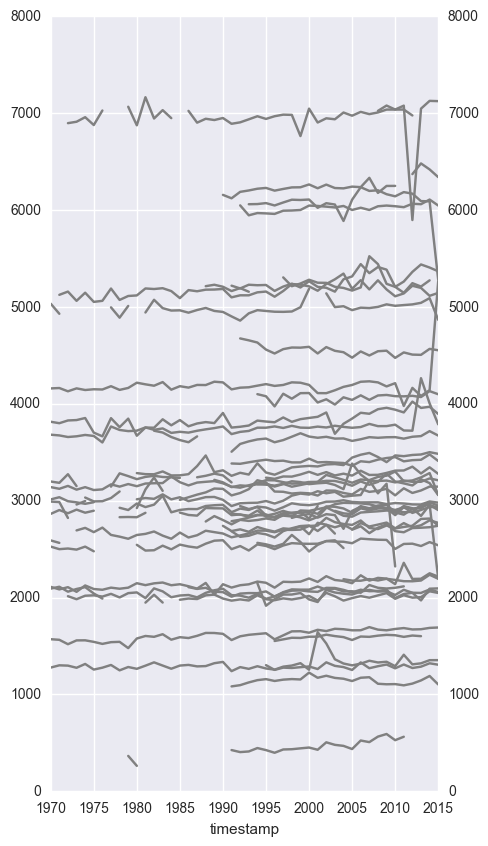

In [136]:
fig  = plt.figure(figsize=(5, 10))
ax = plt.subplot(111)

plot_data.plot(ax=ax, color='gray', legend=False)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

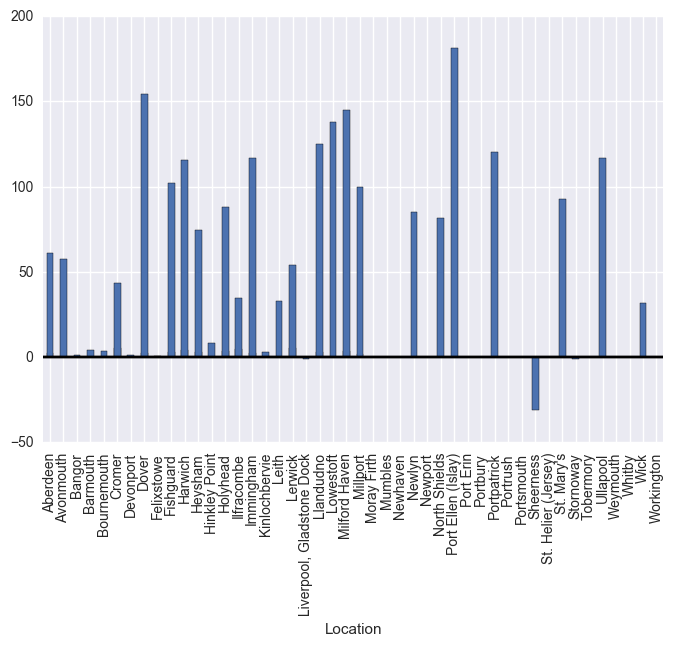

In [137]:
# Check the mean of first 5 values and last 5 values
start_end = pd.DataFrame([plot_data[:10].mean(), plot_data[-10:].mean()]).T

start_end['new_row'] = (1 - start_end[0]/start_end[1])*100

start_end.columns = ['Start', 'End', 'Percent Change']


#stations which have 5 data sets in the 70s and 5 data sets in the present, Out of 89, 15 have negative values

start_end_pct = start_end['Percent Change'].dropna()

start_end_pct.plot(kind='bar'); plt.axhline(0, color='k')


#sea level change

start_end['sea level change'] = start_end['End'] - start_end['Start']

start_end['sea level change'].plot(kind='bar'); plt.axhline(0, color='k')

In [138]:
first_measurement = df.groupby(['Location']).timestamp.first()
stations_1925 = first_measurement[first_measurement.dt.year <= 1925]
stations_1950 = first_measurement[first_measurement.dt.year <= 1950]
stations_1975 = first_measurement[first_measurement.dt.year <= 1975]
stations_1990 = first_measurement[first_measurement.dt.year <= 1990]
stations_2000 = first_measurement[first_measurement.dt.year >= 2000]
stations_2010 = first_measurement[first_measurement.dt.year >= 2010]
stations_2016 = first_measurement[first_measurement.dt.year >= 2016]
# stations_1970
#first_measurement.sort_values()
stations_1950.sort_values()

Location
Newlyn          1915-01-01
Dover           1924-01-01
Aberdeen        1930-01-01
North Shields   1946-01-01
Name: timestamp, dtype: datetime64[ns]

timestamp
2006-12-31    3219.100698
2007-12-31    3212.794967
2008-12-31    3245.707425
2009-12-31    3258.523162
2010-12-31    3301.054150
2011-12-31    3200.619201
2012-12-31    3209.261607
2013-12-31    3240.620348
2014-12-31    3285.375188
2015-12-31    3059.180365
Freq: A-DEC, Name: tide, dtype: float64

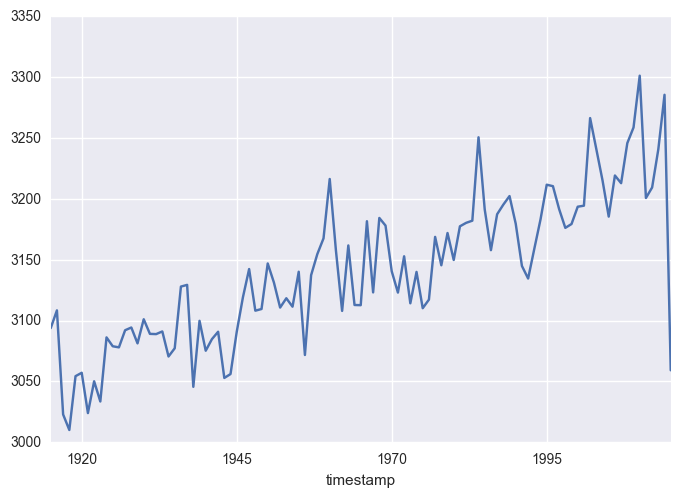

In [139]:
#Newlyn, Probleme für 2015

newlyn = df[df.Location == 'Newlyn'].set_index('timestamp').tide.resample('1A').mean()

newlyn_pct = newlyn.pct_change()

newlyn_diff = newlyn.diff(1)

newlyn.plot()

newlyn.tail(10)

In [121]:
data_1950 = df[(df.Location.isin(stations_1950.index))].groupby(['Location', 'timestamp']).tide.mean().unstack().T
data_1950 = data_1950.resample('1A').mean().apply(np.round)

len(data_1950)
data_1950.head()


Location,Aberdeen,Dover,Newlyn,North Shields
timestamp,,,,
1915-12-31,NaN,NaN,3.0,NaN
1916-12-31,NaN,NaN,3.0,NaN
1917-12-31,NaN,NaN,3.0,NaN
1918-12-31,NaN,NaN,3.0,NaN
1919-12-31,NaN,NaN,3.0,NaN


In [127]:
data = df[(df.timestamp.dt.year >= 1990)
          & (df.timestamp.dt.year <= 2015)].groupby(['Location', 'timestamp']).tide.mean().unstack().T
data = pd.rolling_mean(data.resample("1A").mean(), window=10, min_periods=1)

data.head()



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).mean()
  app.launch_new_instance()


Location,Aberdeen,Avonmouth,Bangor,Barmouth,Bournemouth,Cromer,Devonport,Dover,Felixstowe,Fishguard,...,Sheerness,St. Helier (Jersey),St. Mary's,Stornoway,Tobermory,Ullapool,Weymouth,Whitby,Wick,Workington
timestamp,,,,,,,,,,,,,,,,,,,,,
1990-12-31,2.592002,6.950387,NaN,NaN,NaN,2.800473,NaN,3.766149,2.056286,2.661388,...,3.009079,NaN,NaN,2.920708,2.740712,3.122394,NaN,3.314074,2.091527,NaN
1991-12-31,2.545999,6.920572,NaN,2.684348,NaN,2.778247,3.384261,3.726905,2.032703,2.641836,...,2.976946,NaN,NaN,2.885704,2.713794,3.088534,1.083285,3.285512,2.058391,NaN
1992-12-31,2.541386,6.915632,NaN,2.655732,NaN,2.786263,3.382602,3.721433,2.035481,2.641613,...,2.975887,6.048596,NaN,2.876518,2.710612,3.085496,1.089620,3.286408,2.045718,4.675185
1993-12-31,2.527544,6.920927,NaN,2.649868,NaN,2.787546,3.387256,3.721135,2.038251,2.646720,...,2.976370,5.997303,NaN,2.865877,2.702783,3.093932,1.101157,3.282316,2.033970,4.665349
1994-12-31,2.531789,6.930500,2.148222,2.654264,NaN,2.790177,3.393176,3.727656,2.039752,2.655584,...,2.976958,5.987947,3.168987,2.863608,2.707901,3.117402,1.112785,3.303074,2.034788,4.654506


In [128]:
def plot_grid(df, cols=4, **kwargs):
    fig, axes = plt.subplots(nrows=int(np.ceil(len(df.columns) / cols)), ncols=cols)
    fig.set_figheight(6)
    fig.set_figwidth(8)

    for i, x in enumerate(df.columns):
        ax = axes[i // cols, i % cols]
        df[x].plot(ax=ax, color='blue', legend=False, label=False,
                   kind='line', stacked=False, sharex=False,
                   figsize=(25, 50))
        ax.set_title(x)
        ax.xaxis.set_visible(False)
    return fig

fig = plot_grid(data)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


MemoryError: In RendererAgg: Out of memory

timestamp
1915-12-31    3.093784
1916-12-31    3.108342
1917-12-31    3.022910
1918-12-31    3.010144
1919-12-31    3.054328
1920-12-31    3.057116
1921-12-31    3.024015
1922-12-31    3.050105
1923-12-31    3.033542
1924-12-31    3.086177
Freq: A-DEC, Name: tide, dtype: float64

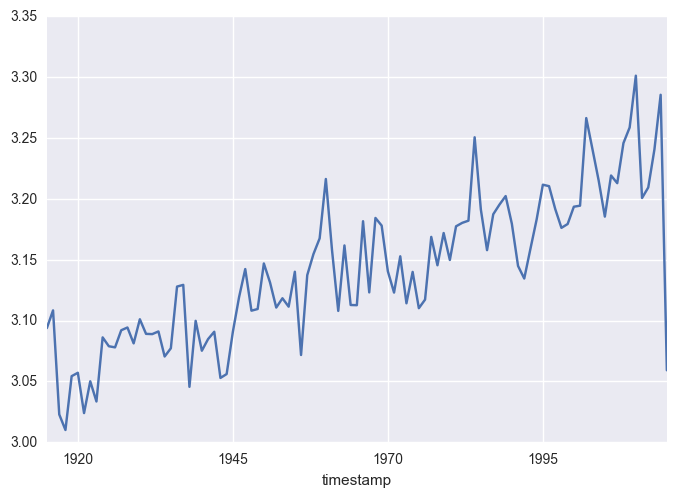

In [130]:
#Newlyn

newlyn = df[df.Location == 'Newlyn'].set_index('timestamp').tide.resample('1A').mean()

newlyn_pct = newlyn.pct_change()

newlyn_diff = newlyn.diff(1)

newlyn.plot()

newlyn.head(10)